# DATA VISUALIZATION AND PREPROCESSING

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("twitter sentiment.csv")
data

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27446,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27447,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27448,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27449,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [20]:
data.shape

(27451, 4)

In [21]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [22]:
data.describe()

,textID,text,selected_text,sentiment
count,27451,27451,27451,27451
unique,27451,27451,22419,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11108


In [23]:
data.isnull()

,textID,text,selected_text,sentiment
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
27446,False,False,False,False
27447,False,False,False,False
27448,False,False,False,False
27449,False,False,False,False


In [24]:
data.drop( 'textID', axis=1, inplace=True)
data

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27446,wish we could come see u on Denver husband l...,d lost,negative
27447,I`ve wondered about rake to. The client has ...,", don`t force",negative
27448,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27449,But it was worth it ****.,But it was worth it ****.,positive


<Axes: xlabel='sentiment', ylabel='count'>

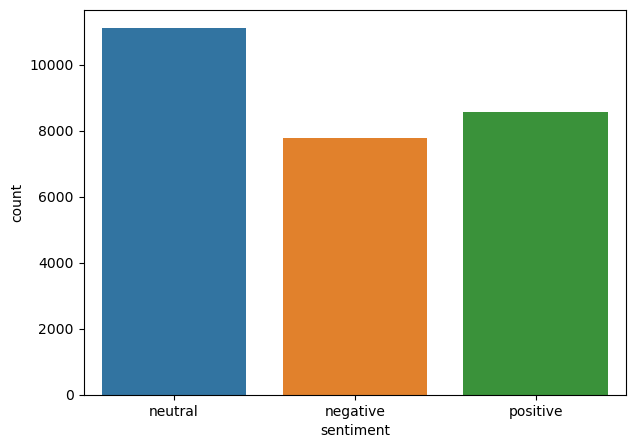

In [46]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=data)

In [41]:
data['sentiment'].value_counts()

neutral     11108
positive     8565
negative     7778
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

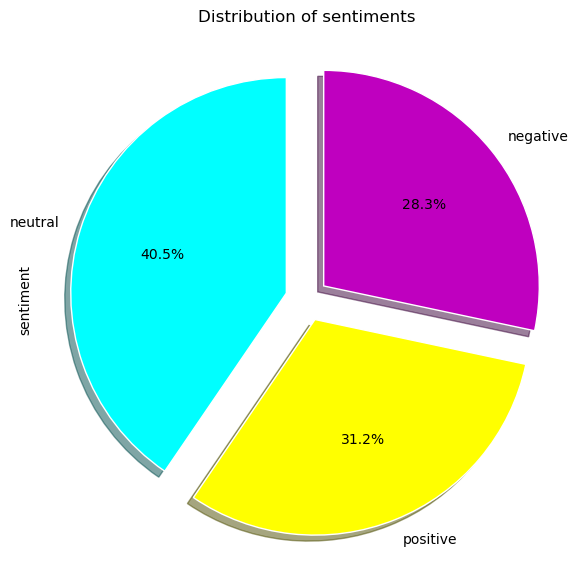

In [43]:
fig = plt.figure(figsize=(7,7))
colors = ("cyan", "yellow", "m")
wp = {'linewidth':1, 'edgecolor':"white"}
tags = data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow= True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode)
plt.title('Distribution of sentiments')

In [49]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   --------------- ----------------------- 61.4/151.4 kB 812.7 kB/s eta 0:00:01
   ------------------------- ------------ 102.4/151.4 kB 737.3 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 944.1 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 944.1 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 944.1 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 502.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud


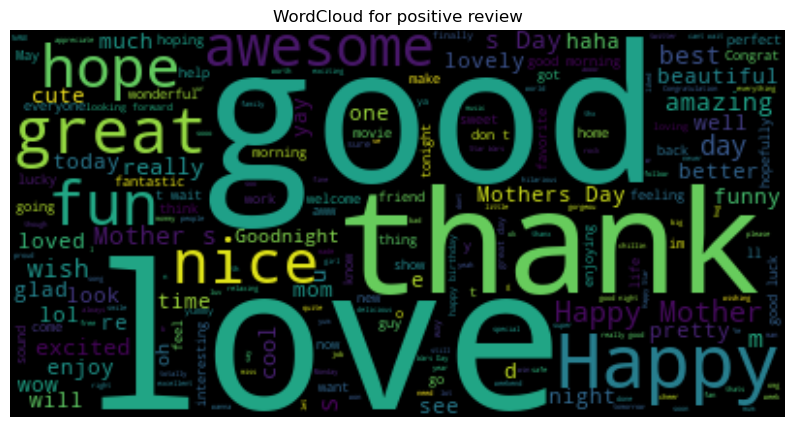

In [56]:
text = " ".join(i for i in data[data['sentiment']=='positive']['selected_text'])
wordcloud = WordCloud( background_color="black").generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for positive review')
plt.show()

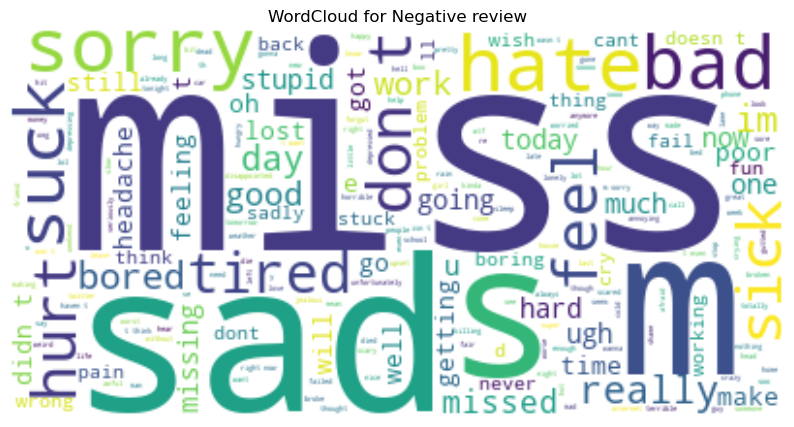

In [62]:
text = " ".join(i for i in data[data['sentiment']=='negative']['selected_text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Negative review')
plt.show()

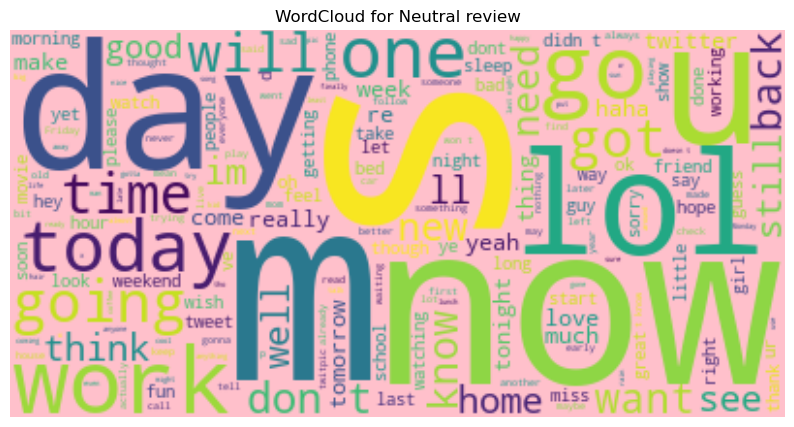

In [63]:
text = " ".join(i for i in data[data['sentiment']=='neutral']['selected_text'])
wordcloud = WordCloud( background_color="pink").generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Neutral review')
plt.show()

# MACHINE TRAINING AND TESTING

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay

In [120]:
x = data['selected_text'].values.astype('U')
y = data['sentiment'].values.astype('U')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

In [126]:
pipe = Pipeline([('tfidf_vectorizer',TfidfVectorizer(lowercase = True,
                                                     stop_words = 'english',
                                                    analyzer = 'word')),
                 
                 ('naive_bayes', MultinomialNB())])


le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pipe.fit((x_train),(y_train))
y_pred = pipe.predict(x_test)
print(confusion_matrix(y_pred, y_test))
print(accuracy_score(y_pred, y_test))
pipe['naive_bayes']

[[1403  118   52]
 [ 831 3049  527]
 [  99  166 1991]]
0.7822972316658572


MultinomialNB()

In [131]:
features = ["Hes just not that into you"]
pipes = pipe.predict(features)
print("Predicted :  {:.2f}".format(pipes[0]))

Predicted :  1.00
